# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно определить параметры объектов недвижимости характеризующие рыночную стоимость объектов недвижимости. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

**Цели исследования:** Изучить рынок недвижимости в г. Санкт-Петербург за исследуемый период. Определить характеристики, которые в наибольшей степени влияют на цену жилья.

**Ход работы:**

Данные о недвижимости мы получим из файла real_estate_data.csv, в нем хранятся основные параметры жилья, такие как площадь, число комнат, высота потолков, этаж и т.д. Также присутствуют картографические характеристики такие, как расстояние до центра города, аэропорта и ближайшего парка.

Сначала мы проверим данные на ошибки и оценим их влияние на исследование. Затем, на этапе поиска неявных аномалий поищем возможность исправить все ошибки данных, которые не приведут к искажение конечного результата. Далее проведем исследование отдельных параметров недвижимости, построим для них отдельные графики распределения и дадим общую оценку. На следующем этапе изучим насколько быстро продаются квартиры в среднем, какие показатели являются аномально долгими, а какие аномально короткими. На последнем этапе определим, какие характеристики в наибольшей степени влияют на конечную цену недвижимости.

Таким образом, наше исследование пройдет в четыре основных этапа:
  1. Выгрузка данных и библиотек
  2. Предобработка данных
  3. Исследовательский анализ, состоящий из -
      - Изучение отдельных параметров недвижимости
      - Изучение времени продажи квартир
      - Определение влияния отдельных параметров на конечную стоимость квартиры
      - Исследования влияния расстояния от квартиры до центра города на конечную стоимость
  4. Подведение итогов

## Выгрузка данных и библиотек

In [1]:
import pandas as pd
import warnings

In [2]:
warnings.simplefilter("ignore")
data = pd.read_csv('real_estate_data.csv', sep='\t')
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

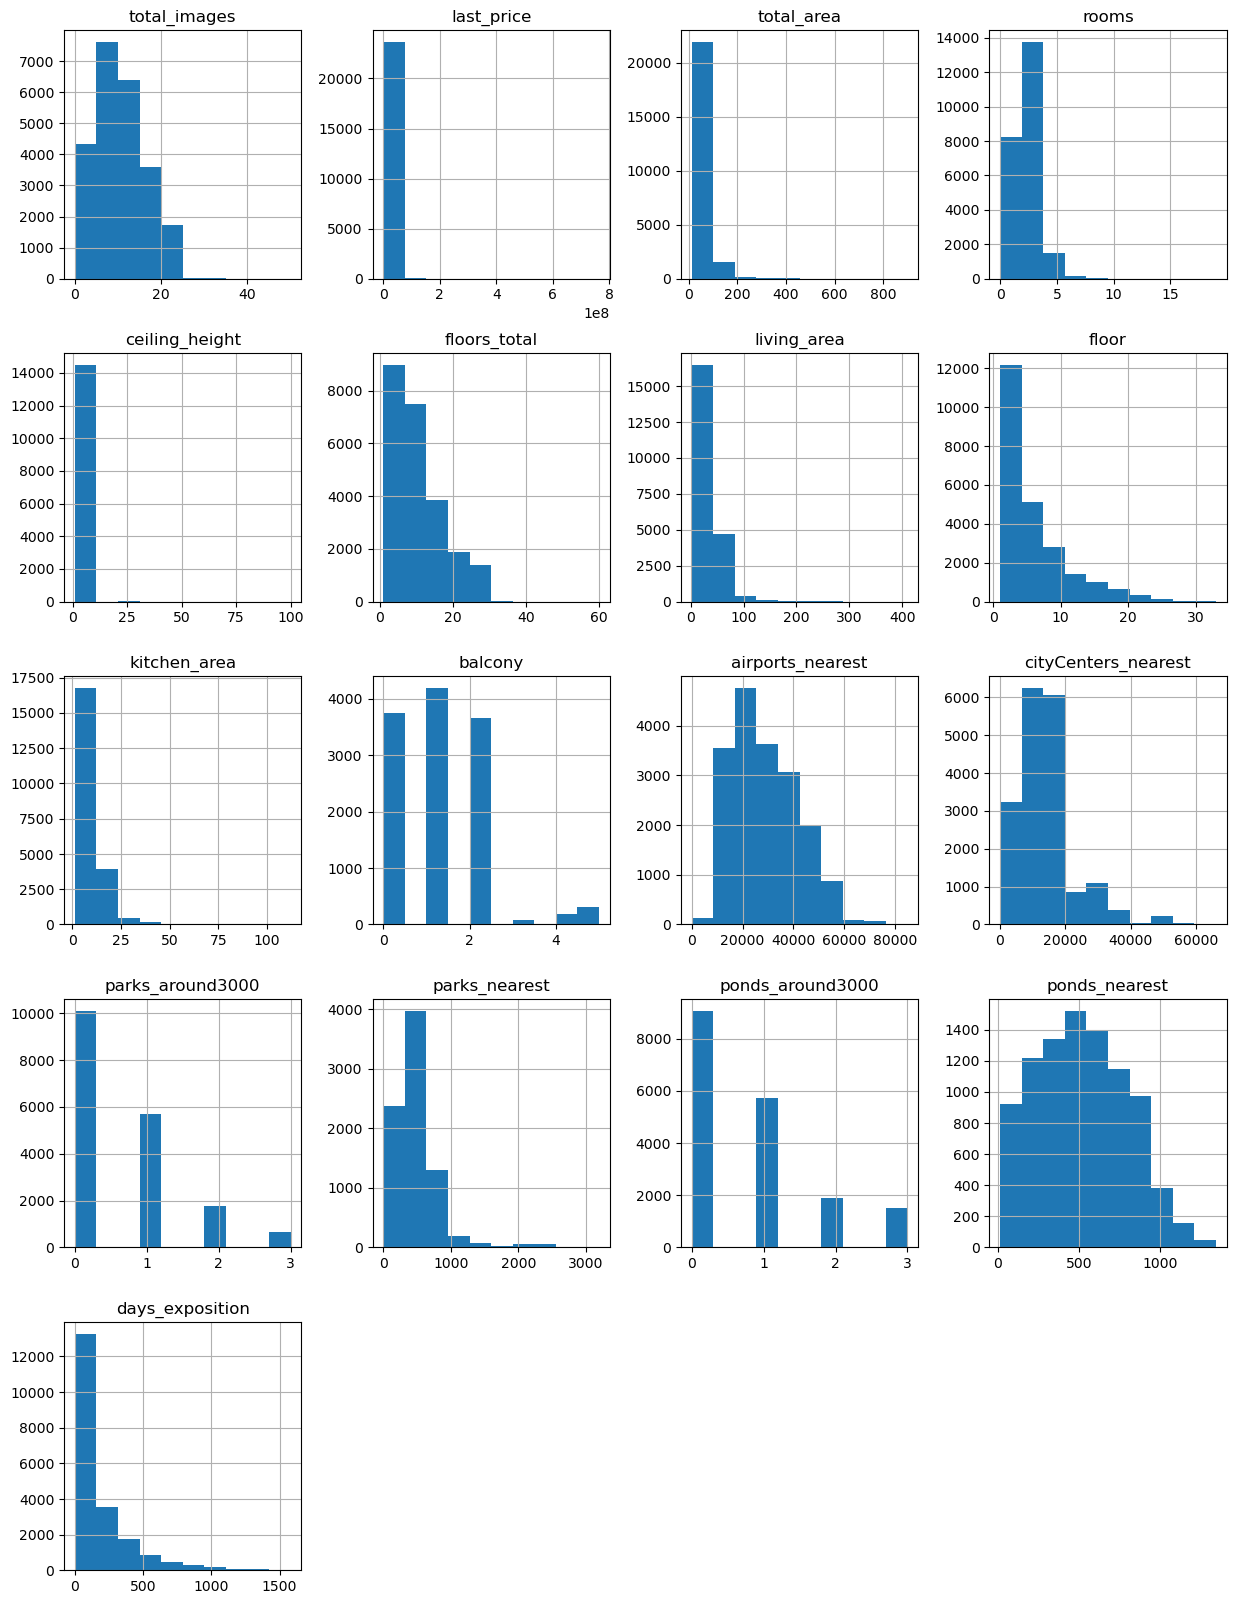

In [3]:
data.hist(figsize=(15, 20))
data.info()

In [4]:
pd.set_option('display.max_columns', None)
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


На первый взгляд видно, что в данных имеются пропуски и аномальные значения. Также часть данных имеет некорректный тип, например дата и время имеют тип строка и т.д.

## Предобработка данных

### Обработка пропусков

In [5]:
old_data = data
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [6]:
# замена пустых значений в столбце balcony на 0
data['balcony'] = data['balcony'].fillna(0)
# удаление строк с пропуском значений в locality_name и floors_total
data = data.dropna(subset=['locality_name','floors_total'])

In [7]:
# замена пропусков в столбце с высотой потолков на медианное значение
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

Поскольку в датасете нет столбцов других столбцов, характеризующих площадь, кроме total_area, living_area и kitchen_area, было принято решение заменить пропуски в столбцах living_area и kitchen area по грубой формуле *total_area = living_area + kitchen_area*. Этот способ не является точным решением, поскольку в нежилую площадь также входят и коридоры, кладовки и санузлы, но для составления характеристики среднего жилья в городе подходит.

Медиана жил площади до 30.0
Среднее жил площади до 34.45482172866331


<AxesSubplot:title={'center':'before'}, ylabel='Frequency'>

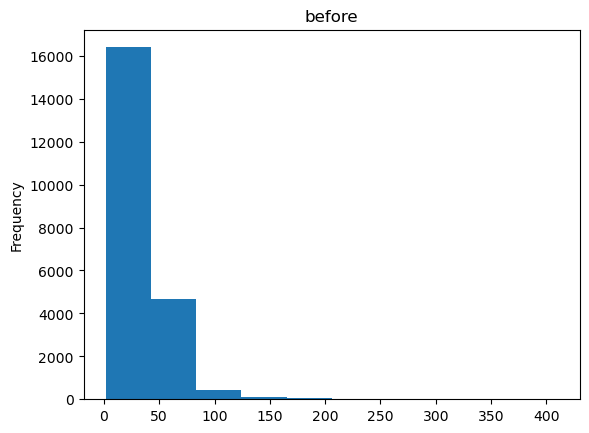

In [8]:
print('Медиана жил площади до', data['living_area'].median())
print('Среднее жил площади до', data['living_area'].mean())
display(data['living_area'].plot(kind='hist',title='before'))

Медиана жил площади после 30.0
Среднее жил площади после 34.903978295780746


<AxesSubplot:title={'center':'after'}, ylabel='Frequency'>

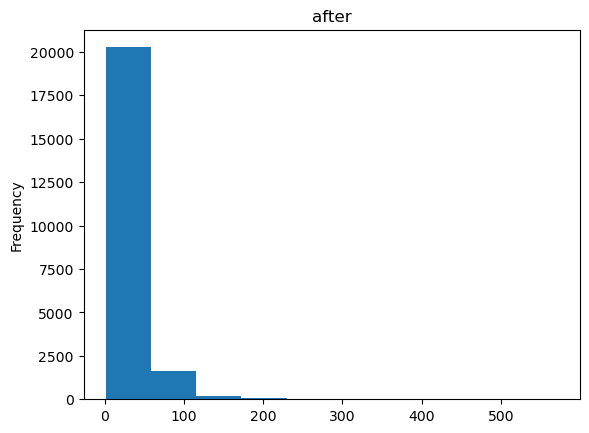

In [9]:
data.loc[(data['living_area'].isna() & ~(data['kitchen_area'].isna())),'living_area'] = \
data['total_area'] - data['kitchen_area']
print('Медиана жил площади после', data['living_area'].median())
print('Среднее жил площади после', data['living_area'].mean())
data['living_area'].plot(kind='hist',title='after')

После замены пустых значений в столбце living_area по формуле *total_area = living_area + kitchen_area* среднее и медиана не изменились, по гистограммам аномалий не было обнаружено

Медиана кухонь до 9.1
Среднее кухонь до 10.56


<AxesSubplot:title={'center':'before'}, ylabel='Frequency'>

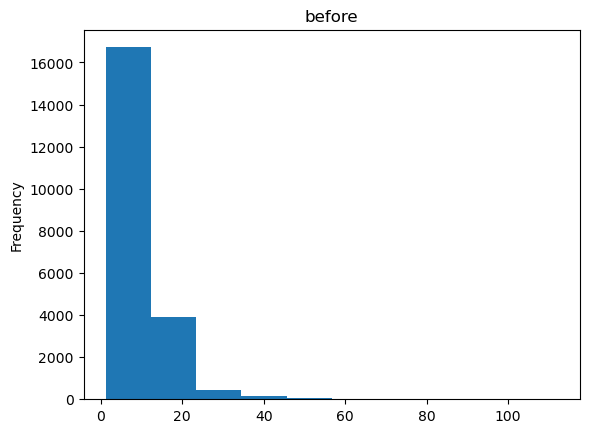

In [10]:
print('Медиана кухонь до', data['kitchen_area'].median())
print('Среднее кухонь до', round(data['kitchen_area'].mean(),2))
display(data['kitchen_area'].plot(kind='hist',title='before'))

Медиана кухонь после 9.27
Среднее кухонь после 10.85


<AxesSubplot:title={'center':'after'}, ylabel='Frequency'>

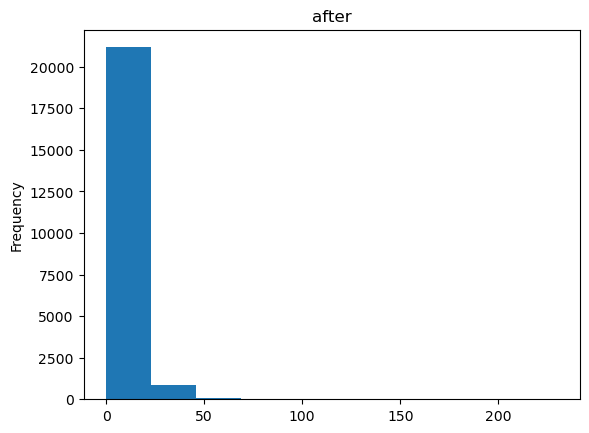

In [11]:
data.loc[(data['kitchen_area'].isna() & ~(data['living_area'].isna())),'kitchen_area'] = \
data['total_area'] - data['living_area']
print('Медиана кухонь после', data['kitchen_area'].median())
print('Среднее кухонь после', round(data['kitchen_area'].mean(),2))
data['kitchen_area'].plot(kind='hist',title='after')

После замены значений в столбце kitchen_area по той же формуле *total_area = living_area + kitchen_area* сильных изменений медианы и среднего не было, на графиках аномалий не обнаружено 

In [12]:
data.query('living_area.isna() & kitchen_area.isna()').shape
# в датасете есть большое количество строк, где есть пропуски и в living_area, и в kitchen_area
# заменить пропуски по грубой формуле total_area = living_area + kitchen_area в этих данных не получится

(1427, 22)

In [13]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1427
floor                       0
is_apartment            20805
studio                      0
open_plan                   0
kitchen_area             1427
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition          3171
dtype: int64

### Обработка дубликатов

In [14]:
data.duplicated().sum()

0

In [15]:
data['locality_name'] = data['locality_name'].str.replace('посёлок ', '')
data['locality_name'] = data['locality_name'].str.replace('городского типа ', '')
data['locality_name'] = data['locality_name'].str.replace('поселок ', '')
data['locality_name'] = data['locality_name'].str.replace('деревня ', '')
data['locality_name'].nunique()

321

### Обработка аномалий

In [16]:
print(data.query('total_area < living_area').shape)
print(data.query('total_area < kitchen_area').shape)
print(data.query('total_area < living_area + kitchen_area').shape)

(0, 22)
(0, 22)
(68, 22)


In [17]:
# исправлены строки, в которых сумма жил площади с кухней больше общей площади
data.loc[(data['total_area'] < data['living_area'] + data['kitchen_area']),'total_area'] = \
data['living_area'] + data['kitchen_area']

<AxesSubplot:>

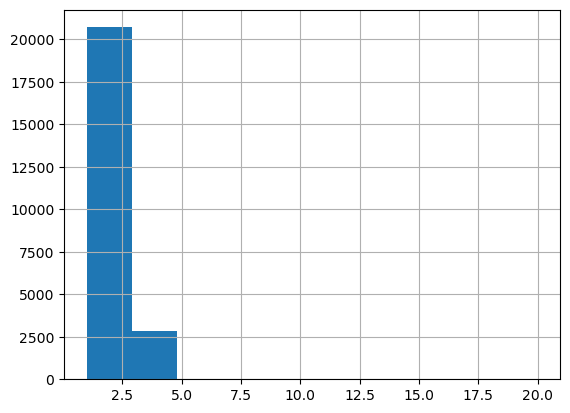

In [18]:
# поделил на 10 значения во всех строках с потолком выше 20м
data.loc[(data['ceiling_height'] > 20), 'ceiling_height'] = data['ceiling_height'] / 10
data['ceiling_height'].hist()

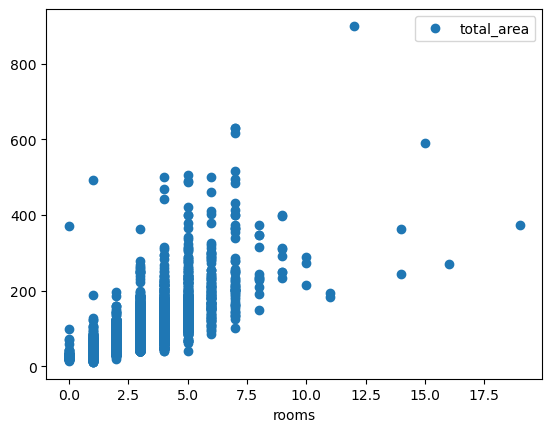

In [19]:
data.plot(x='rooms', y='total_area', style='o')
data = data.query('rooms <= 5')

Недвижимость с 6 и более комнатами является аномальной и может исказить результаты исследований, поэтому их следует убрать.

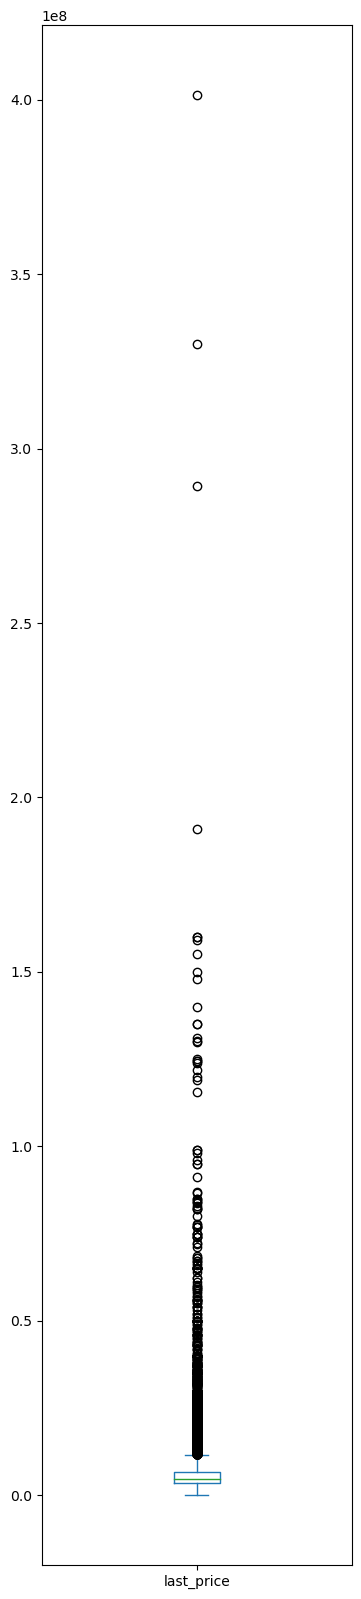

In [20]:
data['last_price'].plot(kind='box', figsize=(4,20))
data = data.query('last_price > 100000 & last_price < 20000000')

Были удалены данные о недвижимости с ценой более 20 миллионов, а так же квартира ценой менее 100 тыс.

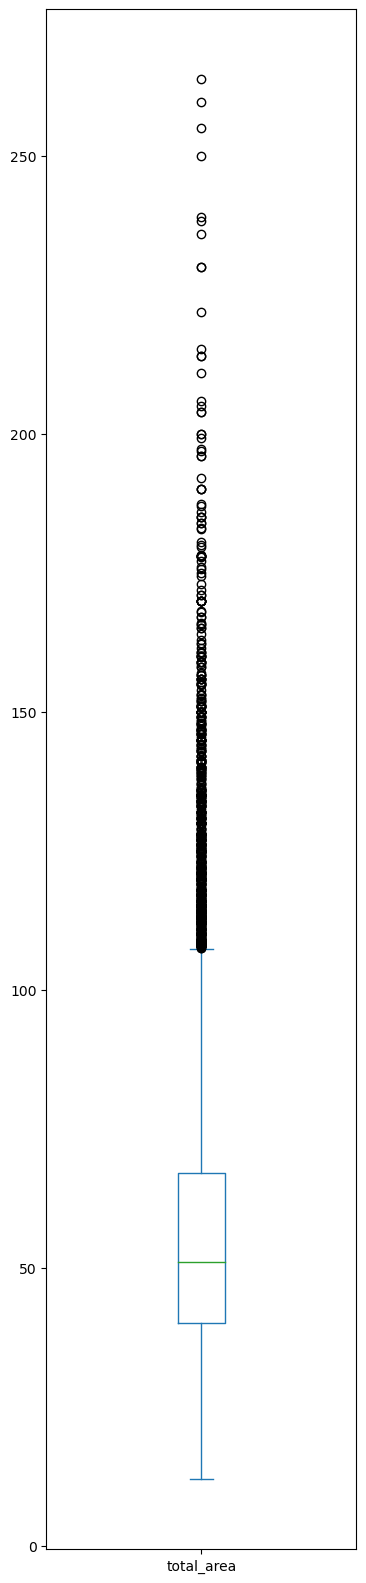

In [21]:
data['total_area'].plot(kind='box',figsize=(4,20))
data = data.query('total_area < 150')

Удалены строки, со значением total_area более 150.

In [22]:
print(data['floor'].min())
print(data['floor'].max())
print(data['floors_total'].max())
data.loc[(data['floors_total'] < data['floor'])].shape

1
33
60.0


(0, 22)

В столбцах floor и floors_total аномалий не обнаружено

In [23]:
print('Данные до предобработки',old_data.shape)
print('Данные после предобработки', data.shape)
print('{:.2%} строк потеряно после предобработки данных'.format(1 - data.shape[0] / old_data.shape[0]))

Данные до предобработки (23699, 22)
Данные после предобработки (22621, 22)
4.55% строк потеряно после предобработки данных


### Преобразование типов данных и добавление новых столбцов

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22621 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          22621 non-null  int64  
 1   last_price            22621 non-null  float64
 2   total_area            22621 non-null  float64
 3   first_day_exposition  22621 non-null  object 
 4   rooms                 22621 non-null  int64  
 5   ceiling_height        22621 non-null  float64
 6   floors_total          22621 non-null  float64
 7   living_area           21275 non-null  float64
 8   floor                 22621 non-null  int64  
 9   is_apartment          2653 non-null   object 
 10  studio                22621 non-null  bool   
 11  open_plan             22621 non-null  bool   
 12  kitchen_area          21275 non-null  float64
 13  balcony               22621 non-null  float64
 14  locality_name         22621 non-null  object 
 15  airports_nearest   

In [25]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['days_exposition'] = data['days_exposition'].astype('int', errors='ignore')

data = data.astype({
    'floors_total': 'int',
    'balcony': 'int',
    'parks_around3000': 'Int64',
    'ponds_around3000': 'Int64',
    'is_apartment': 'bool'
})
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22621 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22621 non-null  int64         
 1   last_price            22621 non-null  float64       
 2   total_area            22621 non-null  float64       
 3   first_day_exposition  22621 non-null  datetime64[ns]
 4   rooms                 22621 non-null  int64         
 5   ceiling_height        22621 non-null  float64       
 6   floors_total          22621 non-null  int32         
 7   living_area           21275 non-null  float64       
 8   floor                 22621 non-null  int64         
 9   is_apartment          22621 non-null  bool          
 10  studio                22621 non-null  bool          
 11  open_plan             22621 non-null  bool          
 12  kitchen_area          21275 non-null  float64       
 13  balcony         

In [26]:
# Цена за квадратный метр
data['area_to_price'] = data['last_price'] / data['total_area']
#день недели, в котором выставили объект на продажу
data['day_of_week'] = pd.DatetimeIndex(data['first_day_exposition']).dayofweek
# месяц, в котором выставили объект на продажу
data['month'] = pd.DatetimeIndex(data['first_day_exposition']).month
# год, в котором выставили объект на продажу
data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year
# расстояние до центра города в км с округлением до целого
data['km_to_center'] = (data['cityCenters_nearest'] / 1000).round()
# цена квартиры в миллионах
data['last_price_m'] = (data['last_price']  / 1000000).round(2)

In [27]:
# функция, принимающая 2 значения, для типизации этажей
def floor_type(current, max):
    if current == 1:
        return 'первый'
    if current == max:
        return 'последний'
    return 'другой'

# применение функции к датафрейму
data['floor_type'] = data.apply(lambda x: floor_type(x.floor, x.floors_total), axis=1)

## Исследовательский анализ данных

### Исследование отдельных объектов

<AxesSubplot:ylabel='Frequency'>

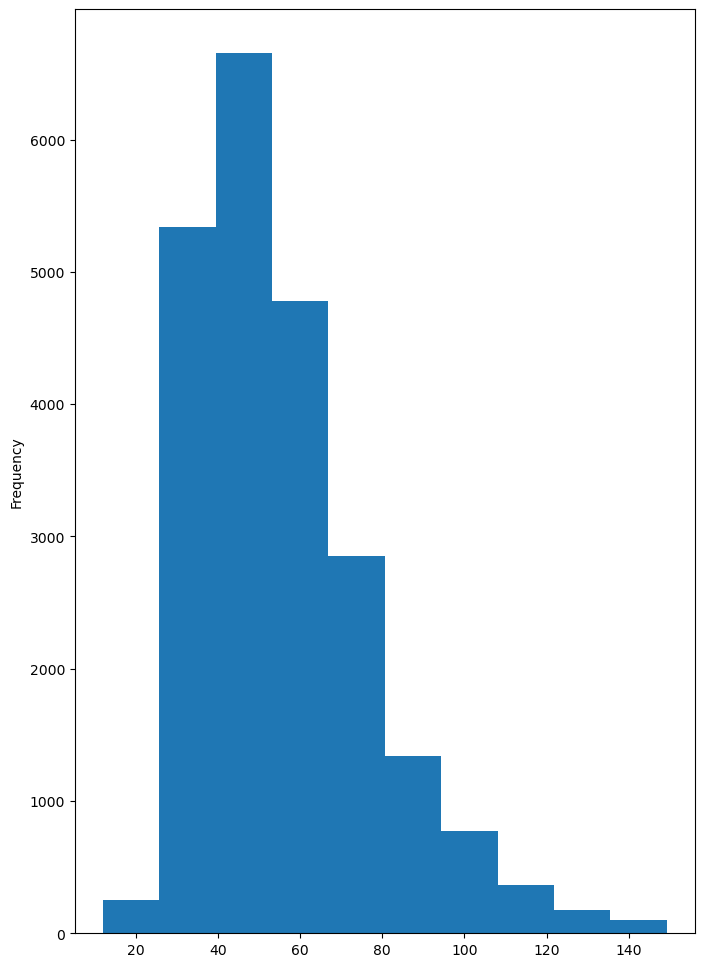

In [28]:
data['total_area'].plot(kind='hist', figsize=(8,12))

В столбце total_area мода ровна примерно 50 кв метрам. Реже всего встречаются встречаются квартиры меньше 30 и больше 120 кв метров.

<AxesSubplot:ylabel='Frequency'>

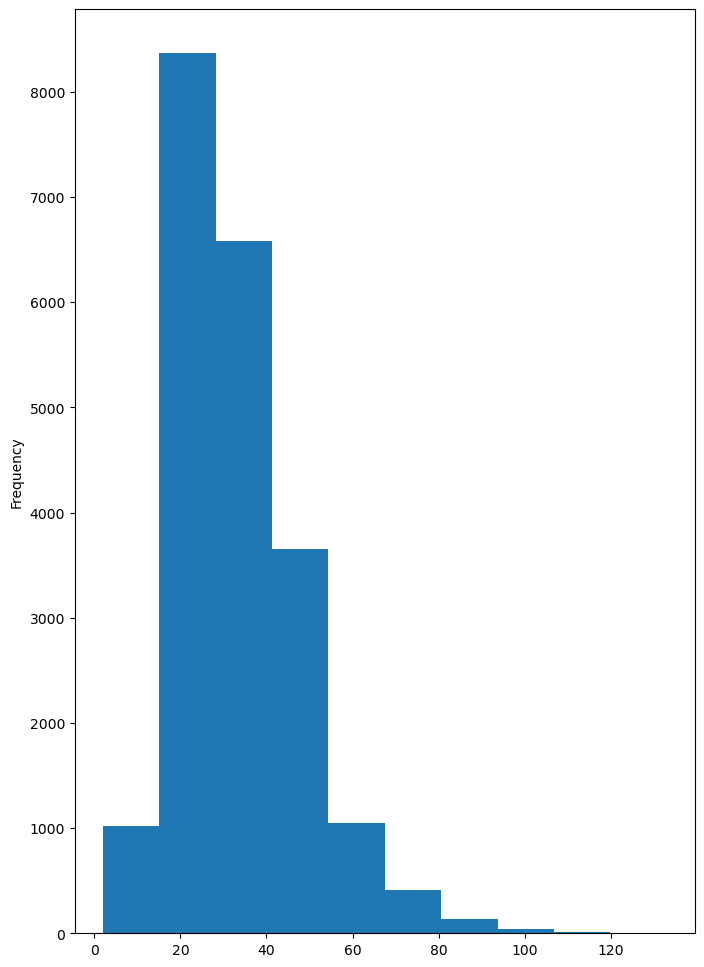

In [29]:
data['living_area'].plot(kind='hist', figsize=(8,12))

Гистограмма living_area идентична гистограмме total_area. Здесь модой можно считать значение около 30кв метров.

<AxesSubplot:ylabel='Frequency'>

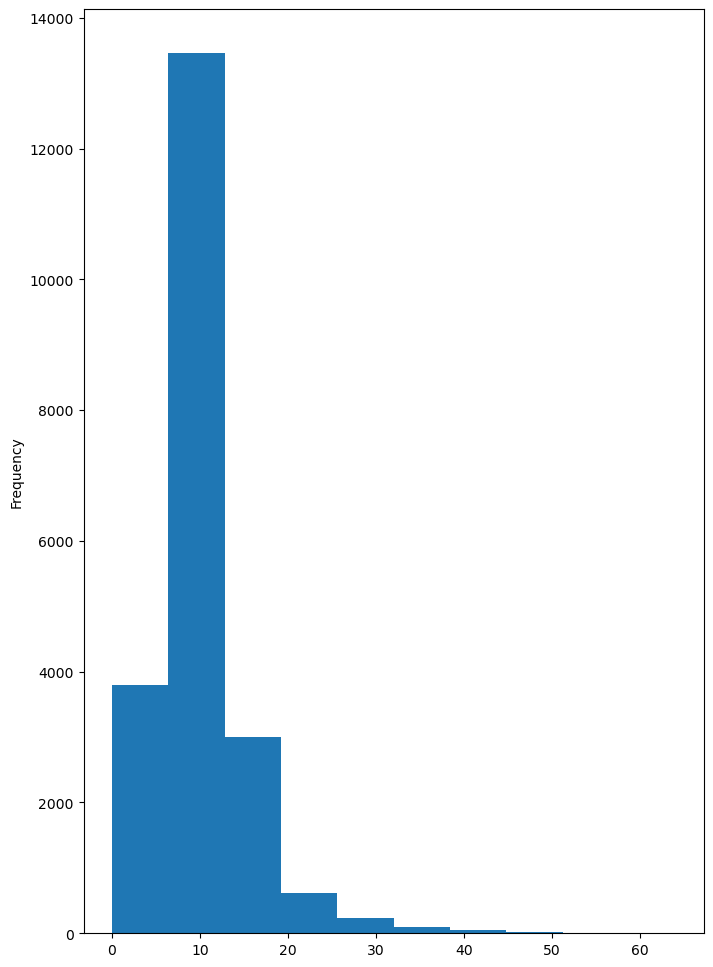

In [30]:
data['kitchen_area'].plot(kind='hist', figsize=(8,12))

Значения в kitchen_area преобладают в диапазоне от 0 до 20 кв.м., остальные значения составляют менее 5 процентов от общей выборки.

<AxesSubplot:ylabel='Frequency'>

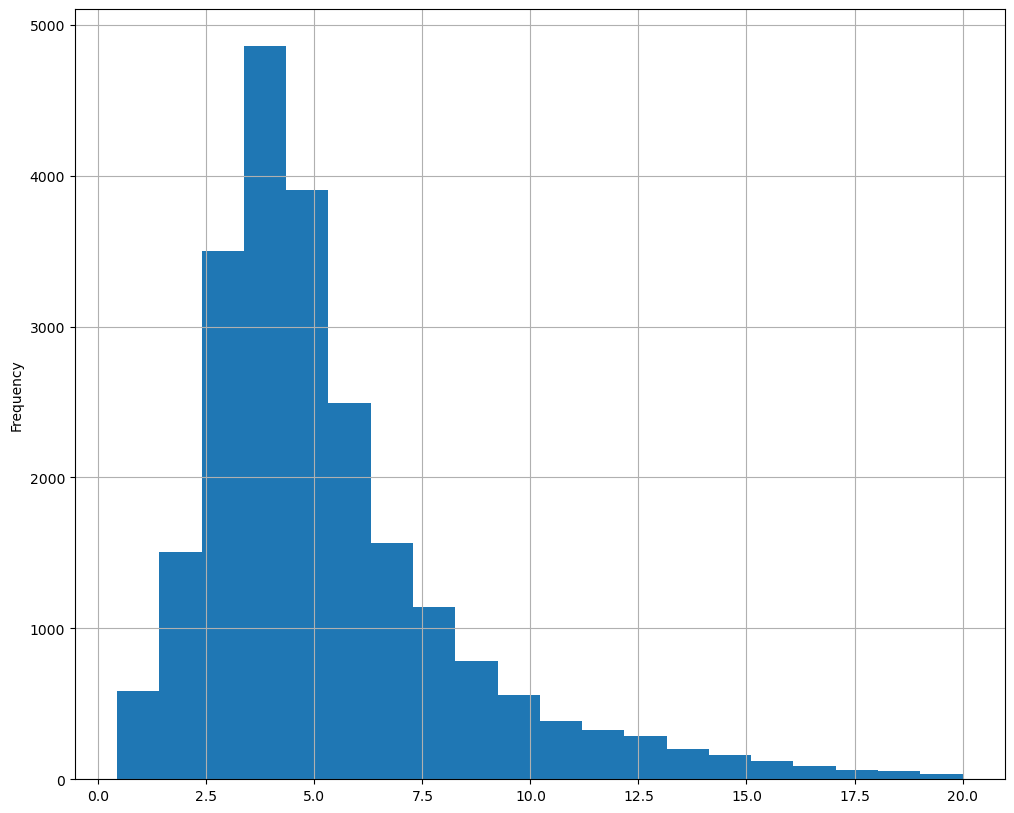

In [31]:
data['last_price_m'].plot(kind='hist', figsize=(12,10), grid=True, bins=20)

Большая часть квартир была продана по цене около 4.5млн, квартир проданных по цене более 10млн - менее 10%.

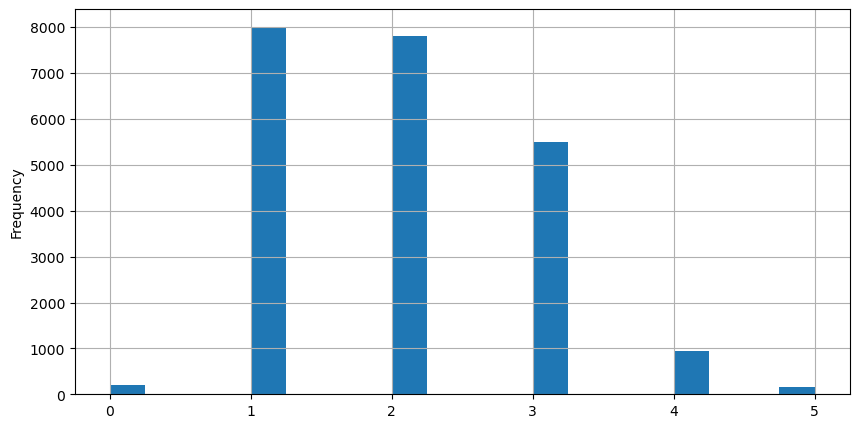

In [32]:
data['rooms'].plot(kind='hist', figsize=(10,5), grid=True, bins=20, xticks=[0, 1, 2, 3, 4, 5])
data.loc[(data['rooms'] == 0),'rooms'] = 1

Большая часть квартир проданых были 1-3 комнатами. Реже квартиры с 4-5 комнатами. В выборке присутствали данные с 6 и более комнатами. Такая недвижимость вряд ли является жилой, а также может исказить результаты итогового анализа. Также в выборке присутствуют квартиры с 0 комнат - возможно это квартиры-студии, тогда следует изменить данные с количеством комнат в этих квартирах 0 на 1.

<AxesSubplot:ylabel='Frequency'>

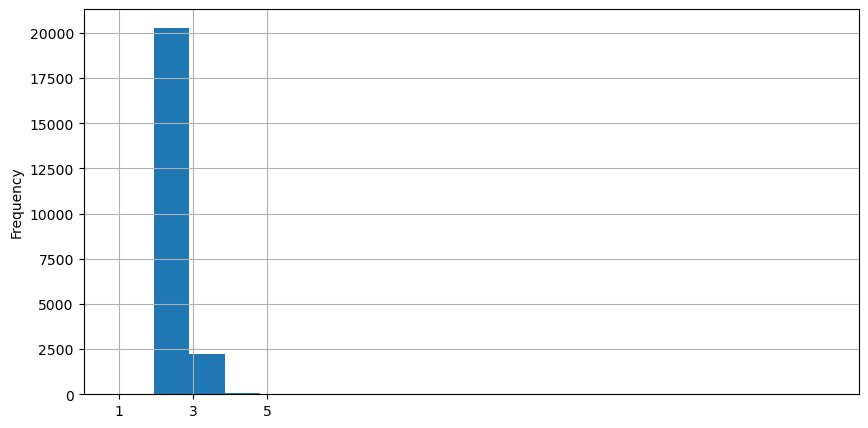

In [33]:
data['ceiling_height'].plot(kind='hist', figsize=(10,5), grid=True, bins=20, xticks=[1, 3, 5])

Большая часть данных в ceiling_height в пределах нормы - от 2 до 3м. Значения от 3м и более могут искожать выборку.

<AxesSubplot:ylabel='Frequency'>

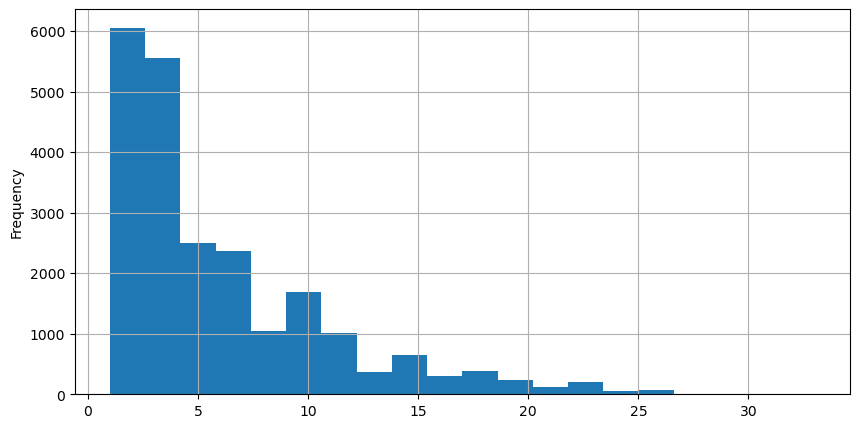

In [34]:
data['floor'].plot(kind='hist', figsize=(10,5), grid=True, bins=20)

Все данные в столбце floor соответствуют действительности, аномалий не обнаружено

<AxesSubplot:>

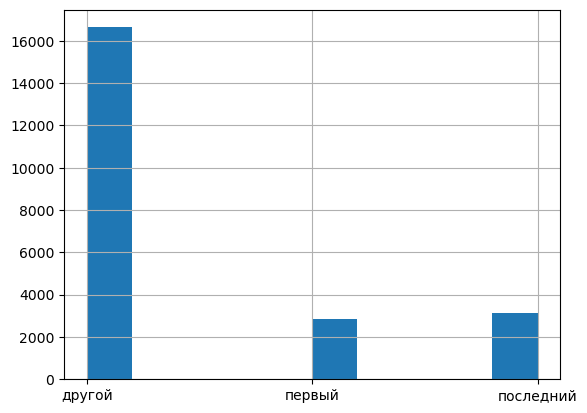

In [35]:
data['floor_type'].hist()

Около 10 процентов недвижимости находится на первом этаже.

<AxesSubplot:ylabel='Frequency'>

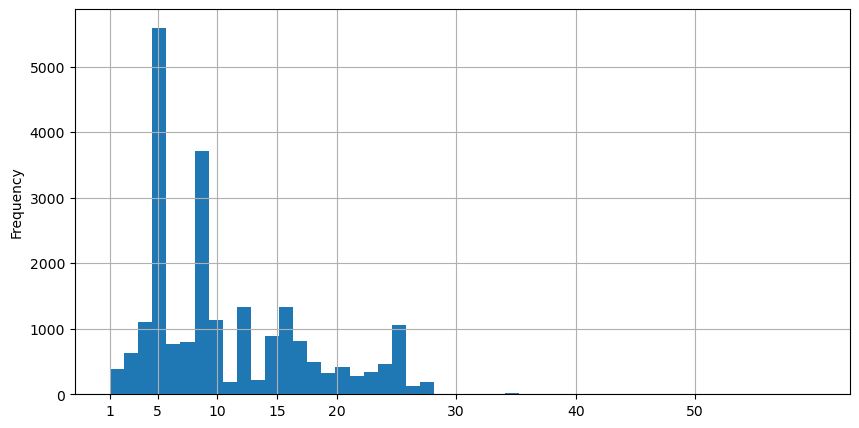

In [36]:
data['floors_total'].plot(kind='hist', figsize=(10,5), grid=True, bins=50, xticks=[1, 5, 10, 15, 20, 30, 40, 50])

Преобладают квартиры в 5и и 8и этажных зданиях.

<AxesSubplot:>

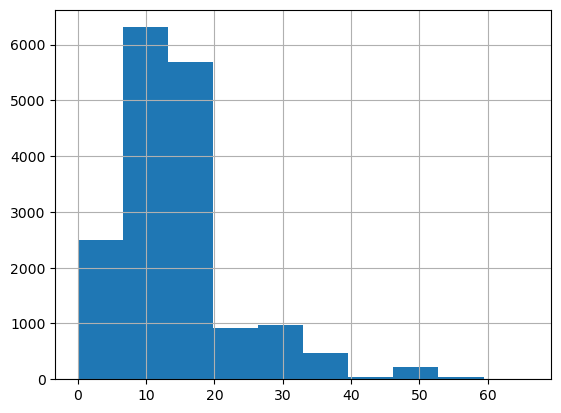

In [37]:
data['km_to_center'].hist()

В столбце km_to_center данные в пределах нормы.

<AxesSubplot:>

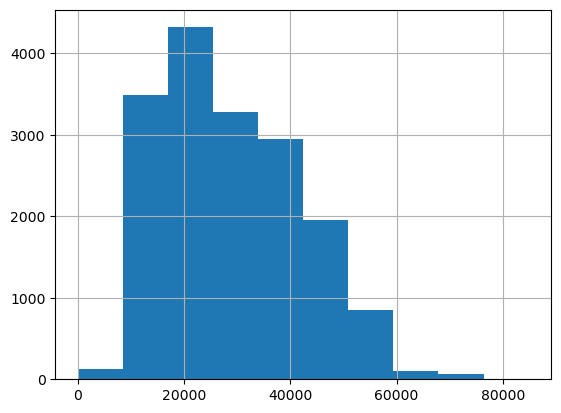

In [38]:
data['airports_nearest'].hist()

В столбце airports_nearest данные в пределах нормы.

<AxesSubplot:>

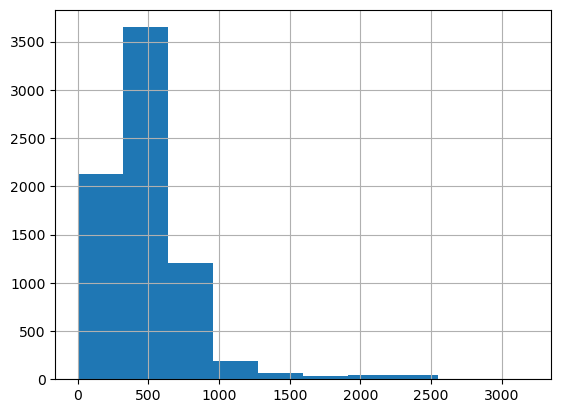

In [39]:
data['parks_nearest'].hist()

В  столбце parks_nearest данные в пределах нормы.

<AxesSubplot:>

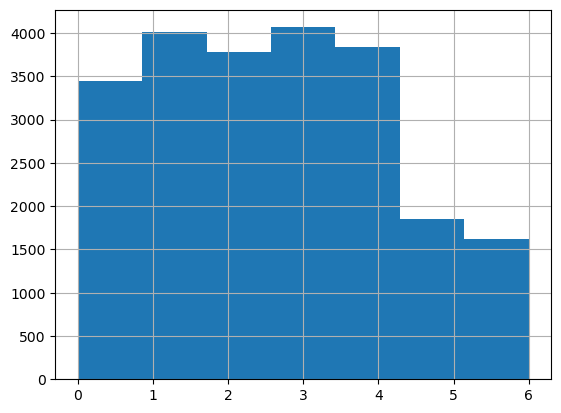

In [40]:
data['day_of_week'].hist(grid=True,bins=7)

Большая часть объявлений о продаже были опубликованы в будние дни.

<AxesSubplot:ylabel='Frequency'>

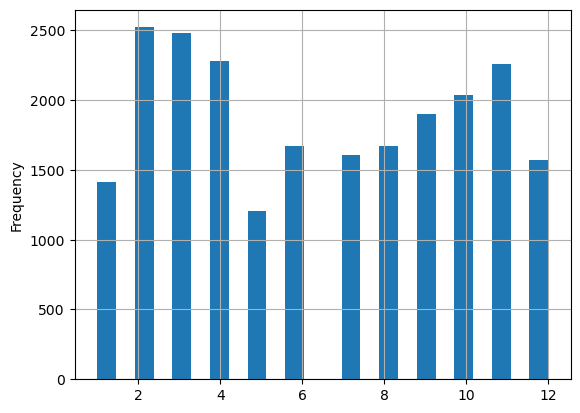

In [41]:
data['month'].plot(kind='hist',grid=True,bins=24, xticks=[2, 4, 6, 8, 10, 12])

Объявления чаще всего публиковались в феврале, затем в марте, апреле и ноябре. Реже всего объявления публиковались в мае.

### Исследование времени продажи квартир

count    19708.000000
mean       176.766440
std        215.579152
min          1.000000
25%         44.000000
50%         93.000000
75%        225.000000
max       1580.000000
Name: days_exposition, dtype: float64

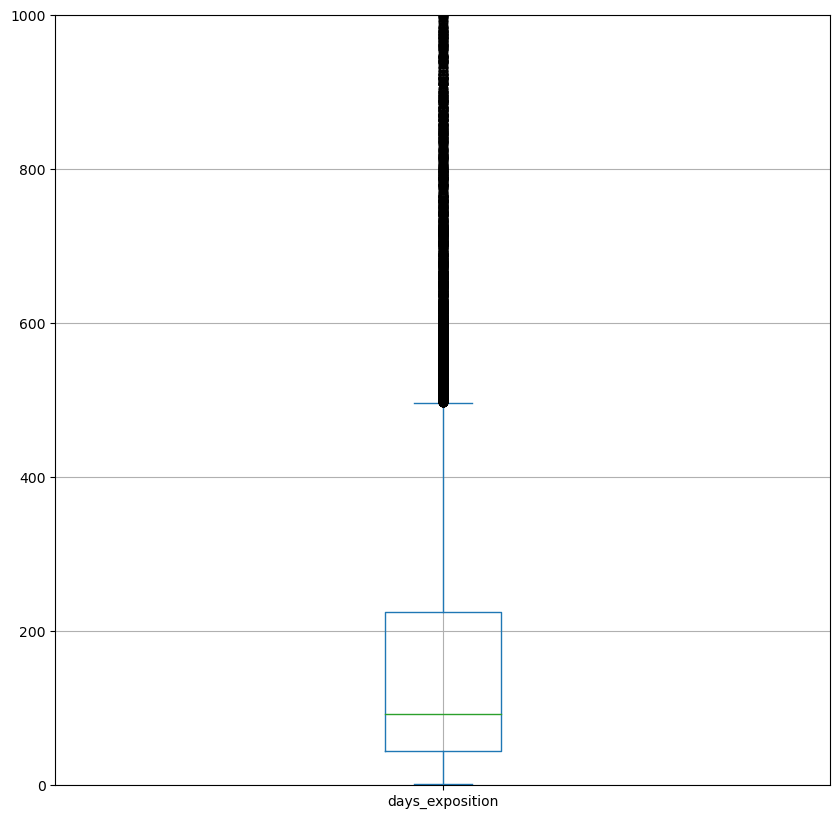

In [42]:
data['days_exposition'].plot(kind='box',grid=True, ylim=(0, 1000), figsize=(10,10))
data['days_exposition'].describe()

По данной диаграмме размаха и ее описанию видно, что среднее время продажи квартир находится в промежутке от 44 до 225 дней, то есть значения в первом и третьем квартилях. Квартиры проданные вне этого промежутка времени можно считать проданными слишком быстро и слишком долго соответственно.
Медиана ровна 93 дням, а среднее арифметическое - 176.77.

### Зависимость цены недвижимости от отдельных характеристик

0.7596745329798505


<AxesSubplot:xlabel='last_price', ylabel='total_area'>

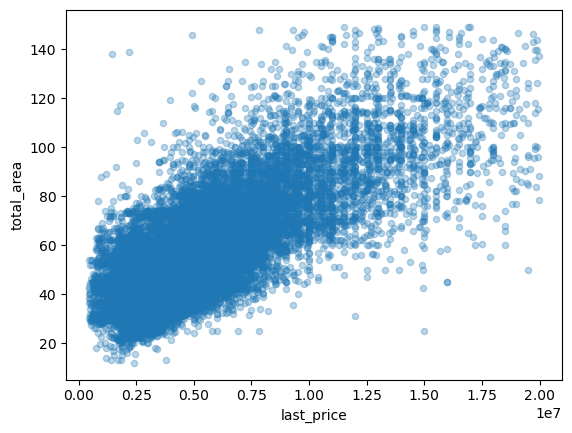

In [43]:
print(data['last_price'].corr(data['total_area']))
data.plot(x='last_price', y='total_area', kind='scatter', alpha=0.3)

Между общей площадью и ценой недвижимости пристствует положительная корреляция - 0.76

0.6321231959947439


<AxesSubplot:xlabel='last_price', ylabel='living_area'>

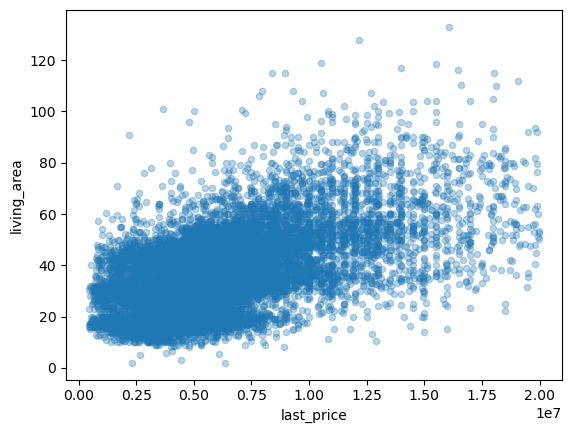

In [44]:
print(data['last_price'].corr(data['living_area']))
data.plot(x='last_price', y='living_area', kind='scatter', alpha=0.3)

Диаграмма рассеяния зависимости жилплощадь/цена похожа на диаграмму общей площади, однако здесь наблюдается меньшая зависимость, что видно по корреляции - 0.63

0.5253941195738437


<AxesSubplot:xlabel='last_price', ylabel='kitchen_area'>

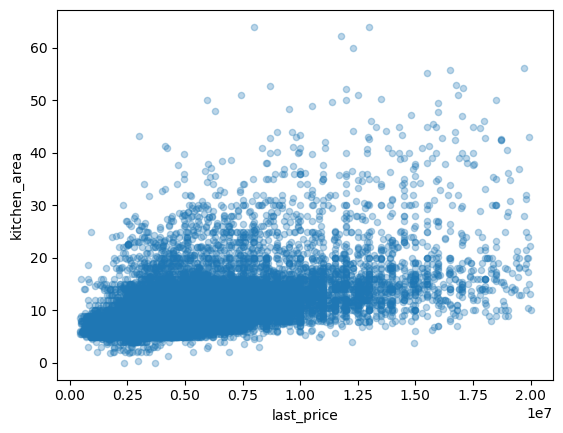

In [45]:
print(data['last_price'].corr(data['kitchen_area']))
data.plot(x='last_price', y='kitchen_area', kind='scatter', alpha=0.3)

Корреляция между размером кухни и конечной стоимостью в таблице довольно слабая - всего 0.52.

0.4710669668160161


<AxesSubplot:xlabel='rooms', ylabel='last_price'>

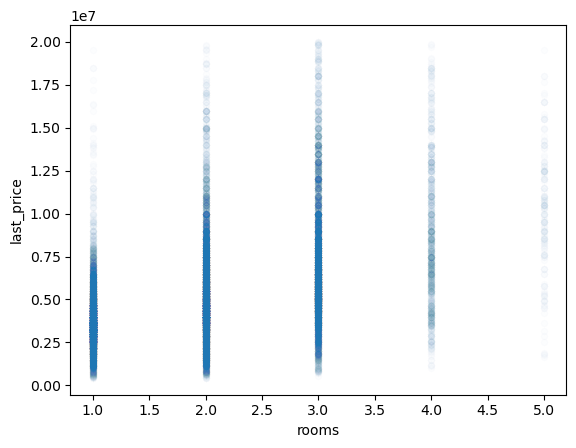

In [46]:
print(data['last_price'].corr(data['rooms']))
data.plot(x='rooms', y='last_price', kind='scatter', alpha=0.01)

Значение корреляции между количеством комнат в квартире и ее ценой всего 0.47.

               median          mean
           last_price    last_price
floor_type                         
другой      4700000.0  5.554950e+06
первый      3850000.0  4.314891e+06
последний   4150000.0  4.945374e+06


<AxesSubplot:xlabel='floor', ylabel='last_price'>

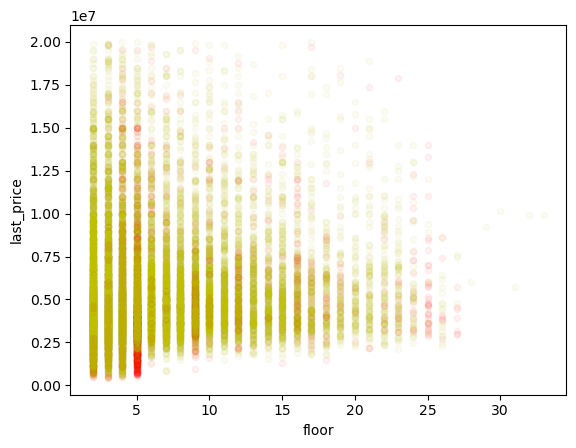

In [47]:
print(data.pivot_table(index='floor_type', values='last_price', aggfunc=['median', 'mean']))
aw = data.query('floor_type == "последний"').plot(x='floor', y='last_price', kind='scatter',color='r', alpha=0.05)
data.query('floor_type == "другой"').plot(x='floor', y='last_price', kind='scatter', alpha=0.05, color='y', ax=aw)

В среднем квартиры на первом этаже стоят меньше, чем на других этажах. Так же можно сказать, что цена квартиры на последнем этаже ниже, чем цена в квартире на том же этаже в доме с большим количеством этажей.

                  median         mean
            last_price_m last_price_m
day_of_week                          
0                  4.525     5.313449
1                  4.600     5.374125
2                  4.590     5.366965
3                  4.500     5.370467
4                  4.500     5.270156
5                  4.500     5.181706
6                  4.495     5.162867


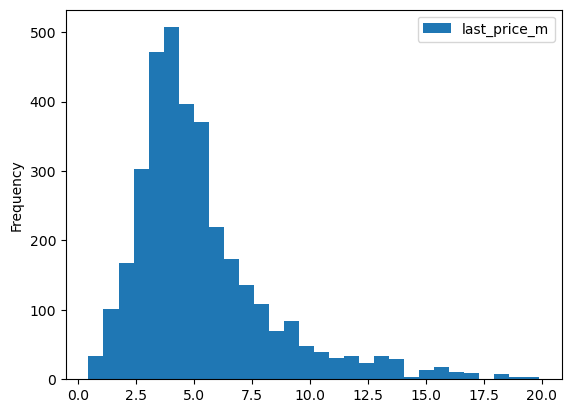

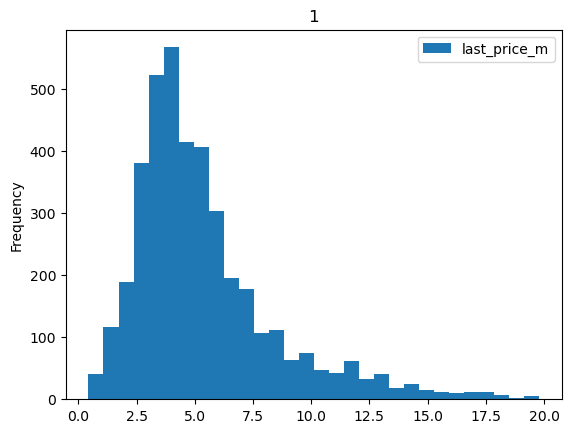

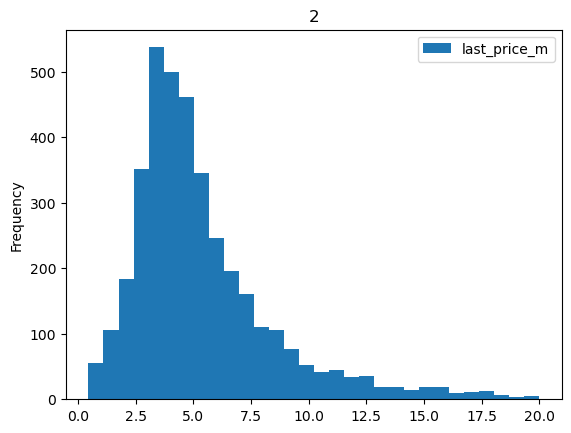

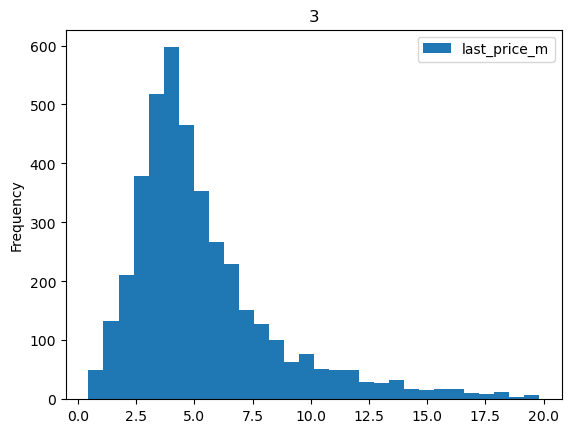

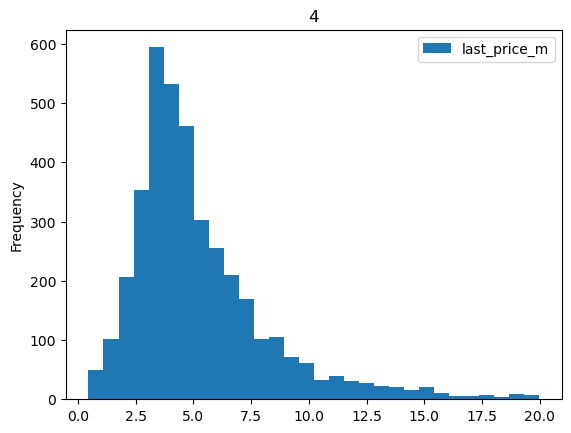

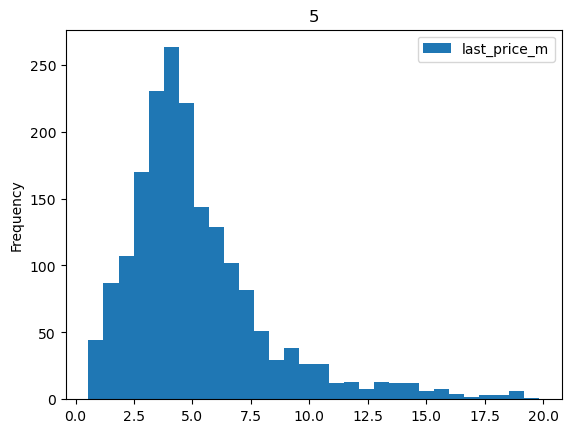

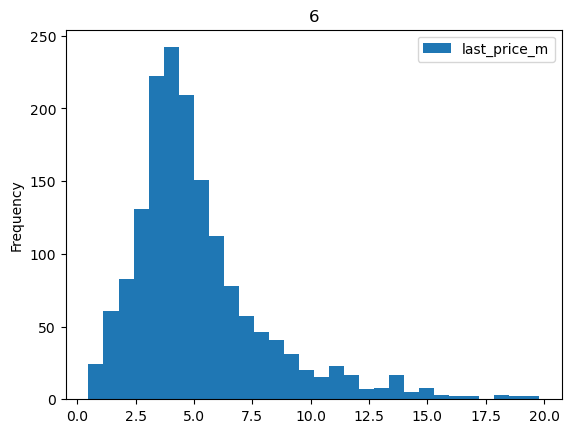

In [48]:
print(data.pivot_table(index='day_of_week', values='last_price_m', aggfunc=['median', 'mean']))
for day, group_data in data.groupby('day_of_week'):
    group_data.plot(y='last_price_m', kind='hist', bins=30, title=day)

По графикам видно, что цена квартиры не зависит от дня публикации объявления о продаже.

            median         mean        count
      last_price_m last_price_m last_price_m
month                                       
1            4.500     5.287798         1417
2            4.500     5.262514         2522
3            4.550     5.301685         2481
4            4.700     5.453553         2277
5            4.450     5.249345         1206
6            4.300     5.076930         1671
7            4.500     5.258915         1604
8            4.500     5.324462         1674
9            4.600     5.509143         1903
10           4.500     5.282048         2036
11           4.600     5.363183         2262
12           4.585     5.325376         1568


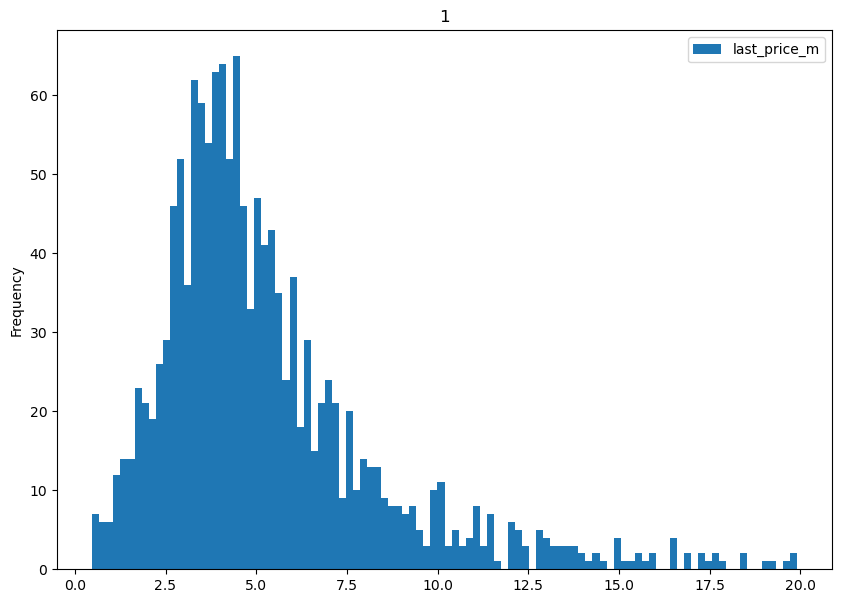

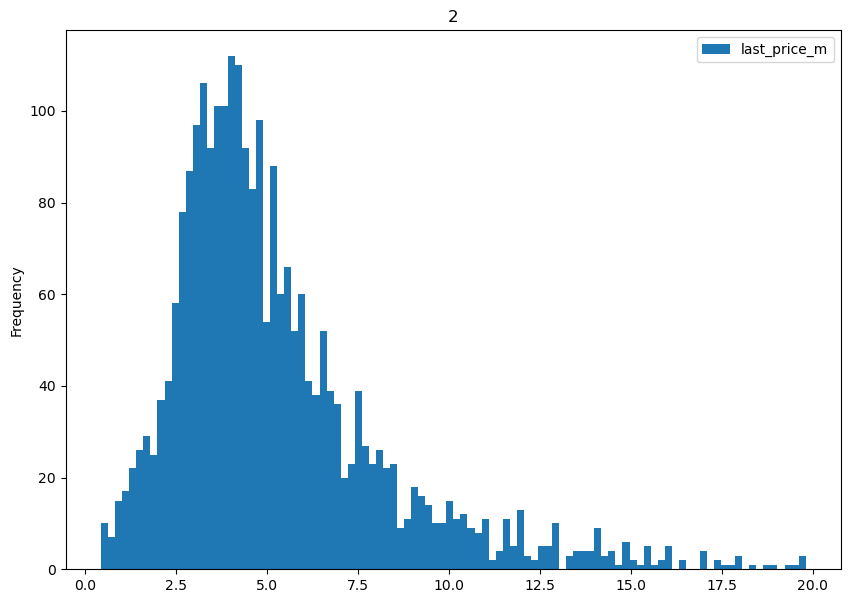

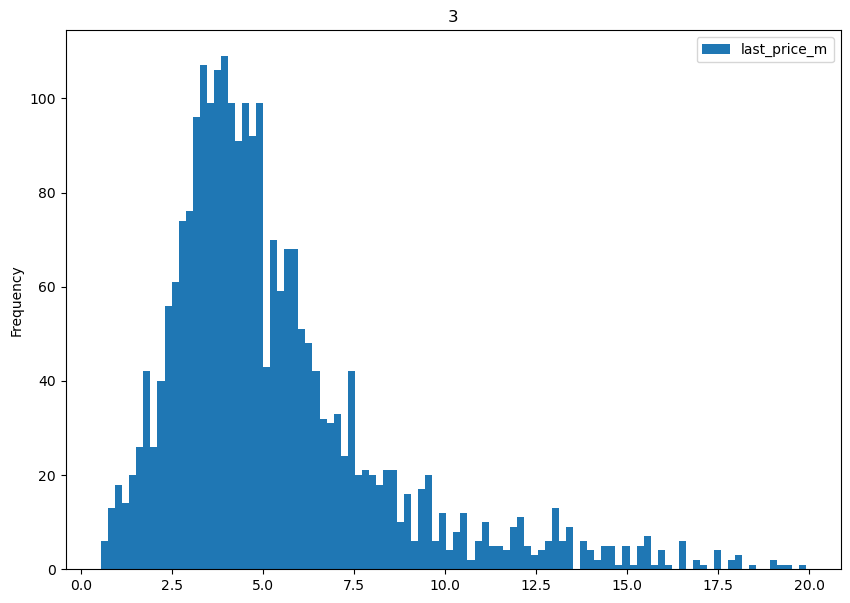

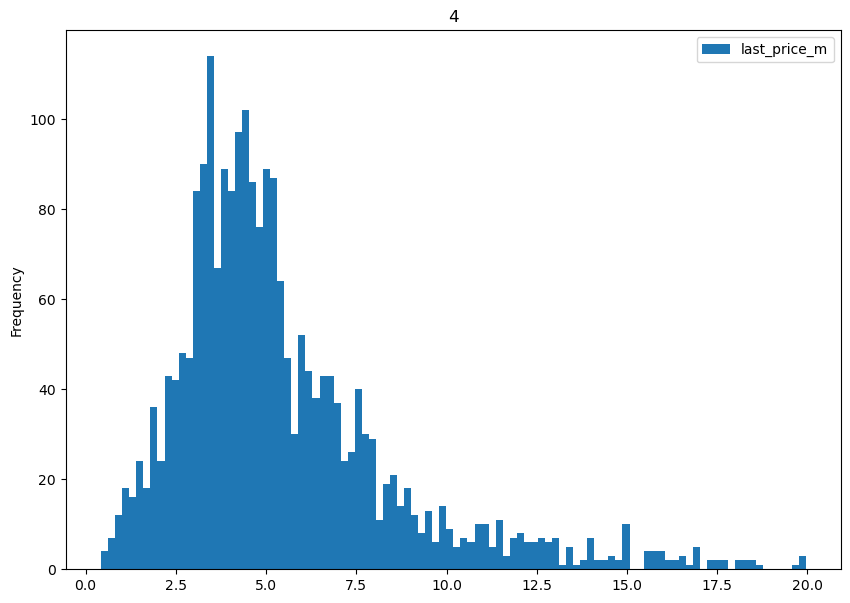

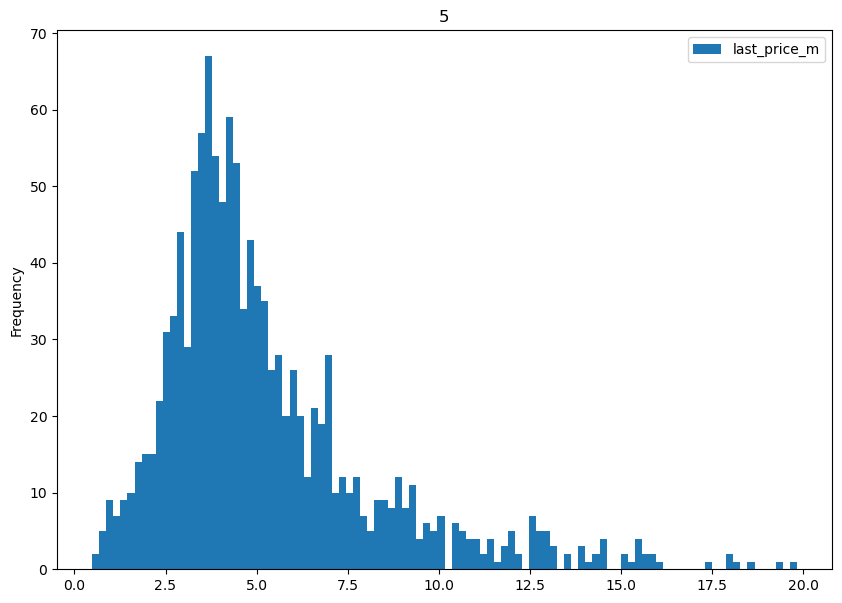

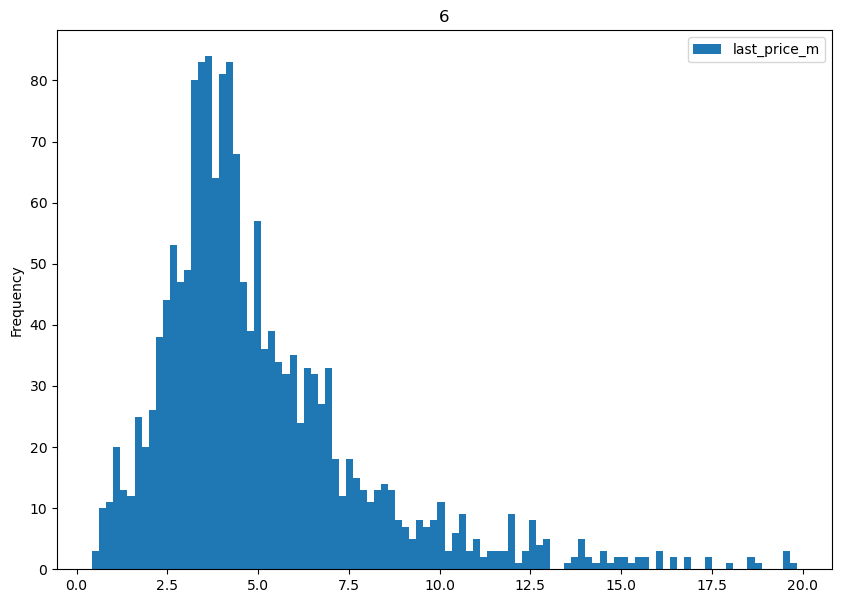

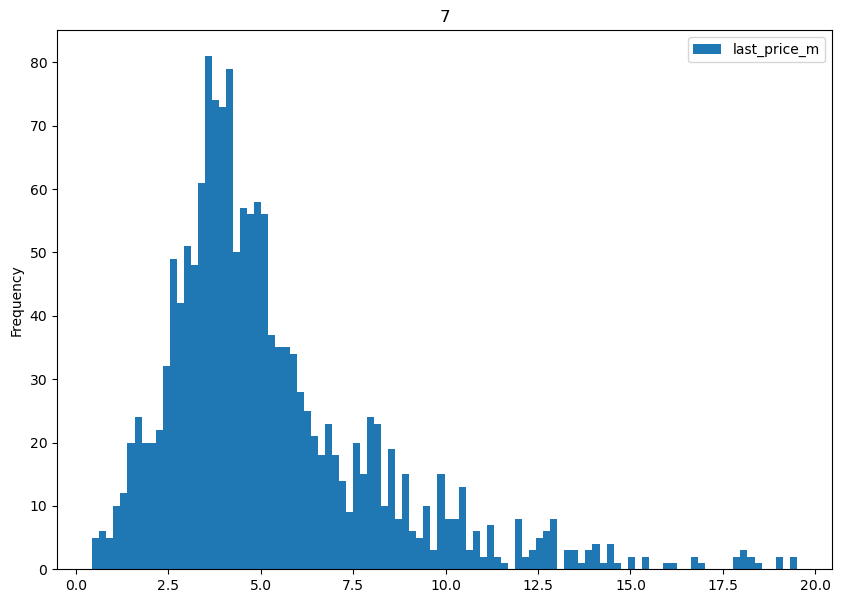

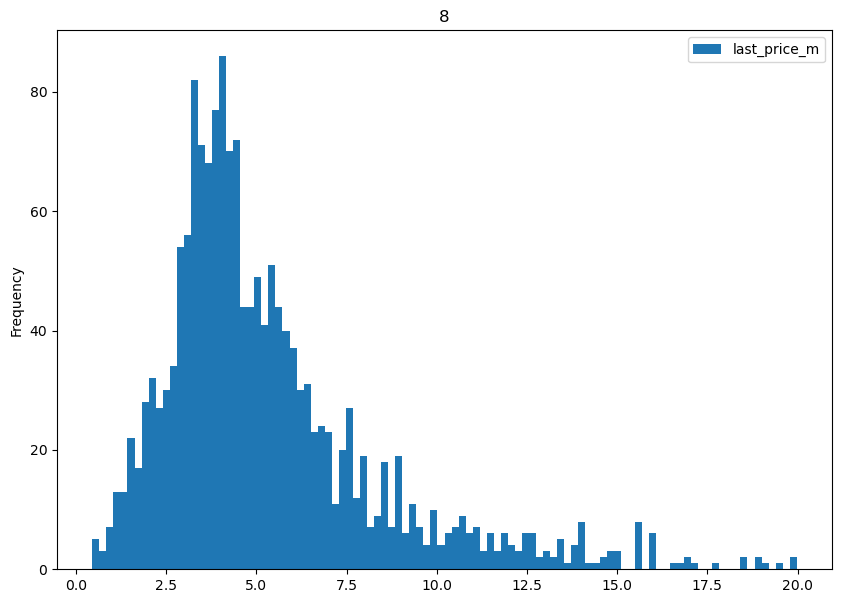

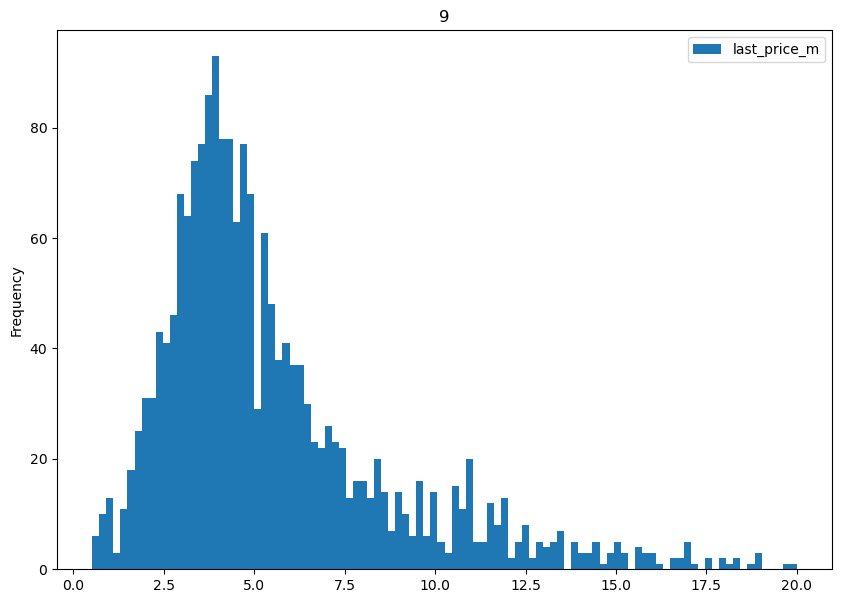

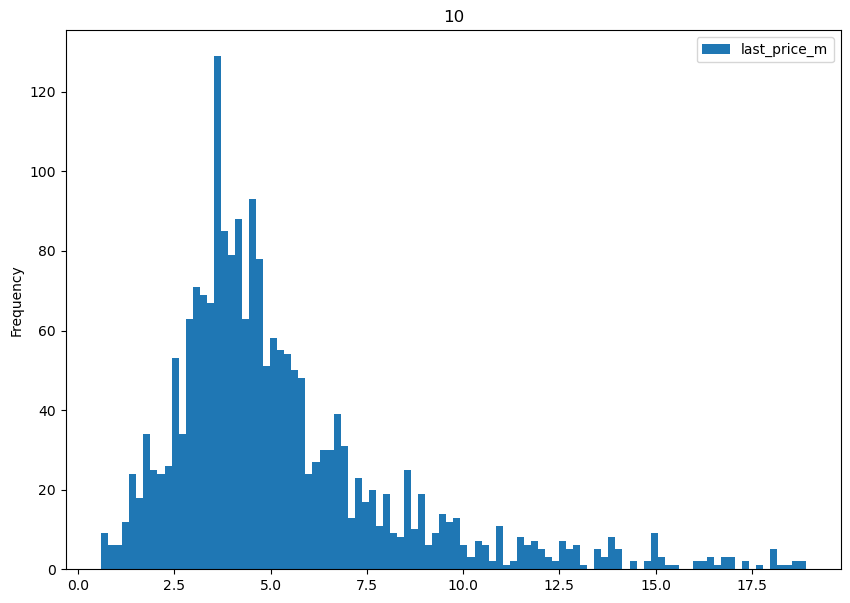

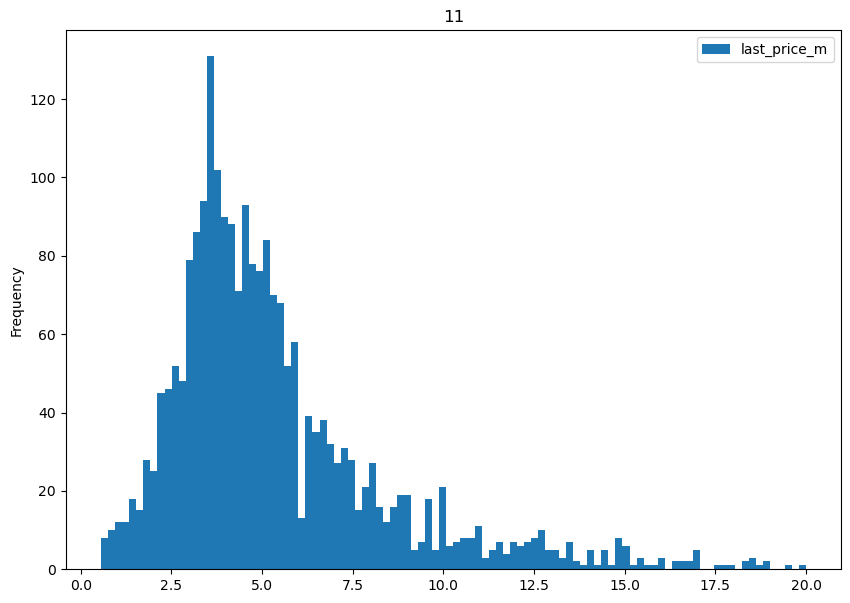

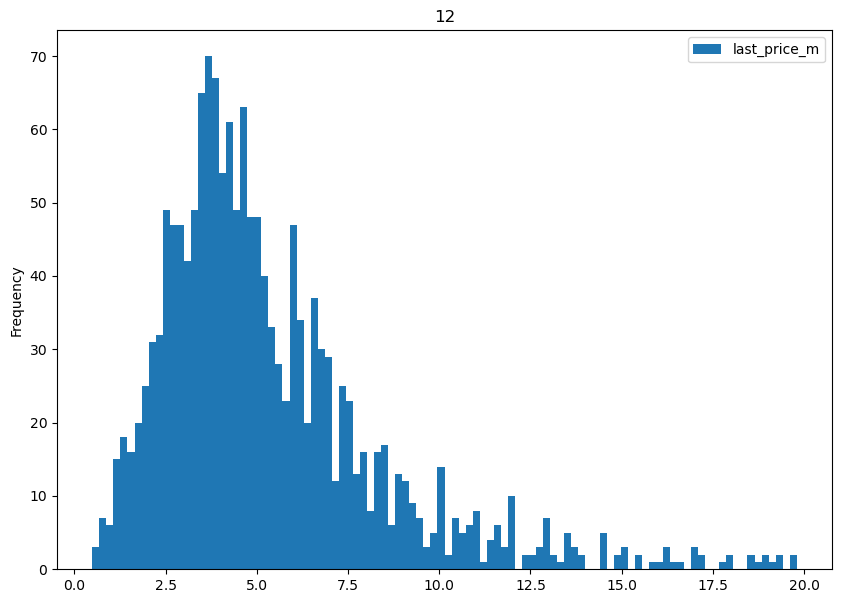

In [49]:
print(data.pivot_table(index='month', values='last_price_m', aggfunc=['median', 'mean', 'count']))
for month, group_data in data.groupby('month'):
    group_data.plot(y='last_price_m', kind='hist', bins=100, title=month, figsize=(10,7))

Средняя цена квартир в январе выше, чем в другие месяцы. Наименьшая средняя цена наблюдается в июне

           median         mean        count
     last_price_m last_price_m last_price_m
year                                       
2014        6.325     7.805000          114
2015        5.100     5.959108         1076
2016        4.400     5.282506         2614
2017        4.400     5.214594         7825
2018        4.500     5.197365         8235
2019        4.950     5.623475         2757


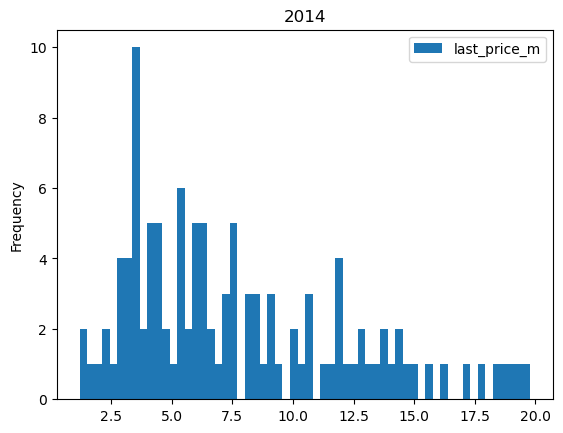

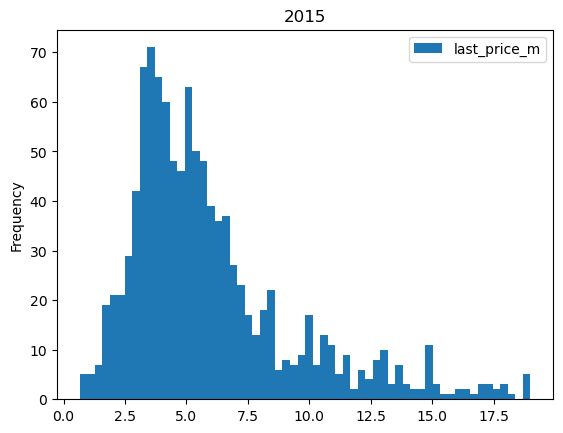

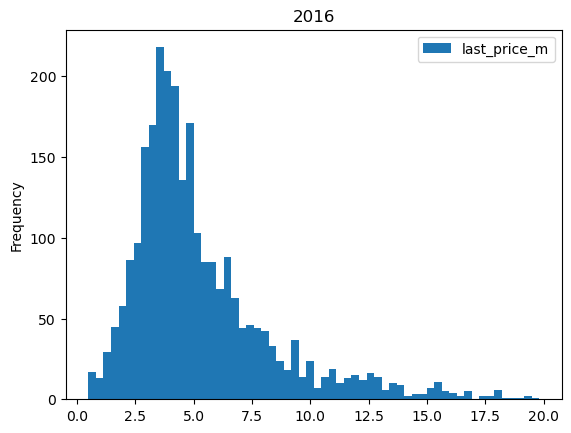

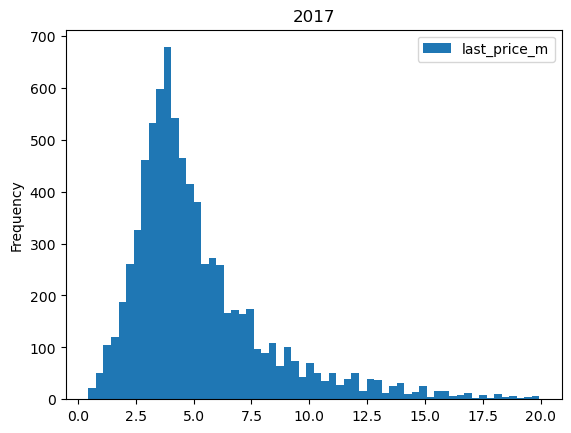

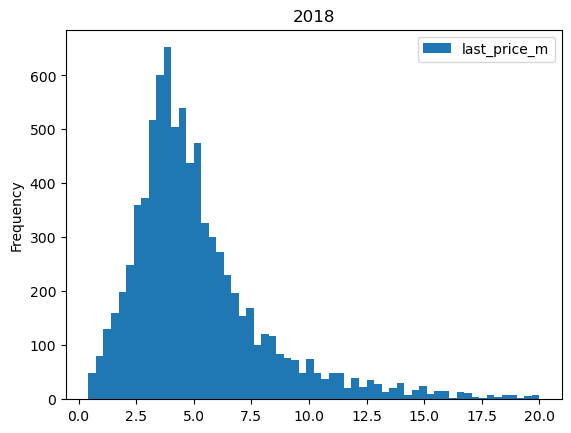

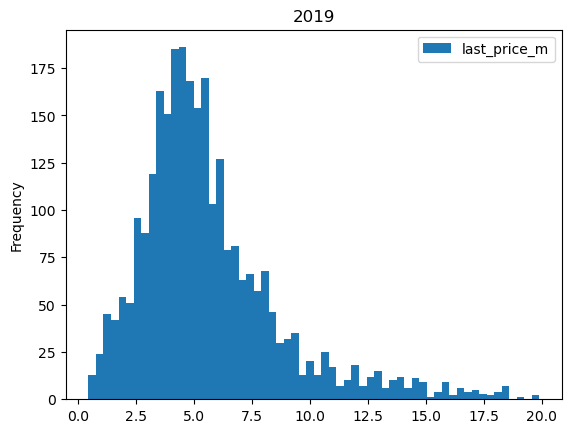

In [50]:
print(data.pivot_table(index='year', values='last_price_m', aggfunc=['median', 'mean', 'count']))
for year, group_data in data.groupby('year'):
    group_data.plot(y='last_price_m', kind='hist', bins=60, title=year)

Наивысшая средняя цена квартир в выборке наблюдается в 2014 году. Далее наблюдается сильный ежегодный спад цен до 2018 года. В 2019 году средняя цена недвижимости начала рости.

### Расчет цены квадратного метра в 10 самых популярных населенных пунктах

In [51]:
locality_data = data.pivot_table(index='locality_name', values='area_to_price', aggfunc=['mean', 'count']).reset_index()
locality_data.columns = ['locality_name', 'mean', 'count']
locality_data = locality_data.query('count > 200 & locality_name != "Санкт-Петербург"').sort_values('mean', ascending=False)

<AxesSubplot:title={'center':'Средняя цена квадратного метра'}, xlabel='locality_name'>

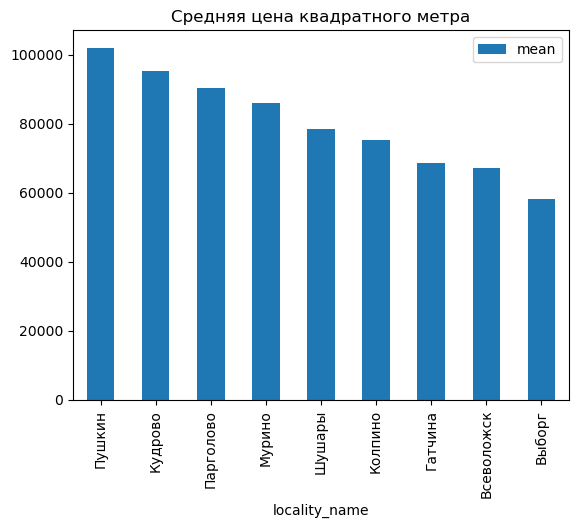

In [52]:
locality_data.plot.bar(x='locality_name', y='mean', title='Средняя цена квадратного метра')

Населенным пунктом с наивысшей средней ценой квардратного метра оказался город Пушкин. Худший показатель наблюдается в городе Выборг.

### Взаимосвязь расстояния до центра города с ценой 

<AxesSubplot:title={'center':'Связь между расстоянием до центра и ценой'}, xlabel='km'>

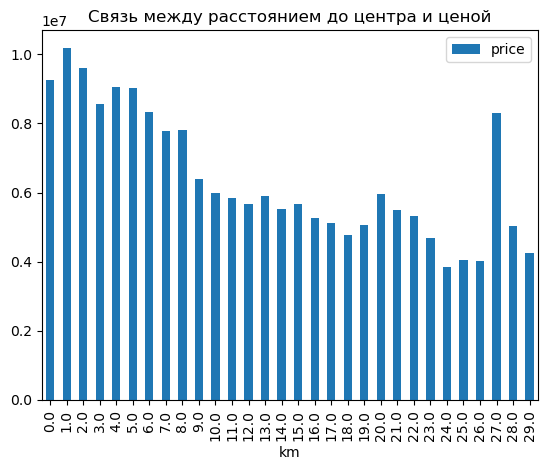

In [53]:
distance_to_price = data.query('locality_name == "Санкт-Петербург"').pivot_table(
    index='km_to_center', values='last_price', aggfunc='mean').reset_index()
distance_to_price.columns = ['km', 'price']
distance_to_price.plot.bar(x='km', y='price', title='Связь между расстоянием до центра и ценой')

По столбчатой диаграмме видно, что стоимость квартиры растет обратно пропорционально расстоянию до центра - чем ближе к центру недвижимость, тем дороже ее стоимость. Между недвижимостью до 8км и от 9км от центра есть сильный скачек в цене, т.е. квартиры можно считать находящимися в центре города, если от здания до центра не более 8км.

## Общий вывод

По итогу текущего исследования был выполнен ряд задач:
 - Определены и заполнены пропуски во всех столбцах, где это возможно. В некоторых столбцах был изменен тип данных для корректной работы с ними. Так же были удалены, либо исправлены все найденные аномальные значения в датасете.
 - Добавлены новый столбцы для детального анализа.
 - И проведен ряд исследований.
 
Исследованы отдельные параметры, в результате чего можно сделать характеристику типичной для датасета квартиры: однокомнатная квартира с общей площадью 50кв.м., жил.площадью 30кв.м., кухней 10кв.м., высотой потолков 2.6м, с ценой - 4,5млн рублей.

Найден средний временной промежуток, за который продаются выстравленная недвижимость - от 44 до 225 дней. Можно сказать, что продажи совершенные менее чем за 44 дня необычно быстрыми, а продажи совершенные более чем через 225 - долгими.

Наибольшее влияние на конечную цену оказывает общая площадь квартиры, а в следствие и жил. площадь. Не мало важным фактором является год, в котором продавалась квартира. Так же большое влияние оказывает расположение квартиры в зданиии - ценник квартиры расположенной на первом или последнем этаже здания в среднем ниже, чем цена такой же по характеристикам квартиры, расположенной на другом этаже. Как следствие влияния общей площади можно выделить зависимость ценника квартиры от количества комнат в ней.

Найдена средняя цена одного квадратного метра в населенных пунктах около Санкт-Петербурга с наибольшим числом объявлений. Из них можно выделить цену одного квадратного метра в городе Пушкин - имеет наивысшую среднюю цену, а наименьшим результатом обладает город Выборг.

Исследована зависимость расстояния от центра города до объекта, по итогу которого можно сказать, что расстояние от центра является одним ключевых факторов итоговой цены квартиры, а недвижимость можно назвать находящейся в центре города, если расстояние от центра до здания не более 8 километров.

Проведя ряд исследований с данными из датасета продажи недвижимости в Санкт-Петербурге и населенных пунктах около него, теперь можно узнать цену квартиры, зная ее общие характеристики.